# Text-as-data methods

In this tutorial, we will do some traditional as well as new-fangled NLP, by looking into sentiment analysis. The dataset that we will use is from an NLP shared task: https://alt.qcri.org/semeval2017/task4/index.php?id=data-and-tools
and available here: https://github.com/leelaylay/TweetSemEval

In shared tasks, many researchers participate to build models on a given dataset and are ranked based on the performance of these models. This particular shared task is detailed in the following report: [SemEval-2017 Task 4: Sentiment Analysis in Twitter](https://aclanthology.org/S17-2088/).

In [1]:
import pandas as pd

In [2]:
datapath = 'https://raw.githubusercontent.com/leelaylay/TweetSemEval/master/dataset/train/twitter-2013train-A.txt'
data = pd.read_csv(datapath, sep = '\t', names = ['id', 'sentiment', 'text'])
data

,id,sentiment,text
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...
...,...,...,...
9679,103158179306807296,positive,RT @MNFootNg It's monday and Monday Night Foot...
9680,103157324096618497,positive,All I know is the road for that Lomardi start ...
9681,100259220338905089,neutral,"All Blue and White fam, we r meeting at Golden..."
9682,104230318525001729,positive,@DariusButler28 Have a great game agaist Tam...


### Let's explore the data a bit

<Axes: xlabel='sentiment'>

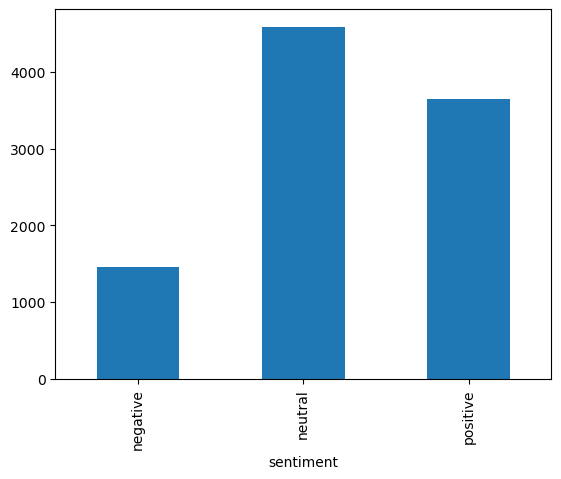

In [3]:
data.groupby('sentiment').size().plot(kind = 'bar')

In [4]:
# check for duplicates
data['text'].nunique()

9649

In [5]:
data['text'].head().values

array(['Gas by my house hit $3.39!!!! I\\u2019m going to Chapel Hill on Sat. :)',
       'Theo Walcott is still shit\\u002c watch Rafa and Johnny deal with him on Saturday.',
       'its not that I\\u2019m a GSP fan\\u002c i just hate Nick Diaz. can\\u2019t wait for february.',
       'Iranian general says Israel\\u2019s Iron Dome can\\u2019t deal with their missiles (keep talking like that and we may end up finding out)',
       'Tehran\\u002c Mon Amour: Obama Tried to Establish Ties with the Mullahs http://t.co/TZZzrrKa via @PJMedia_com No Barack Obama - Vote Mitt Romney'],
      dtype=object)

In [6]:
# check for social media specific content, such as urls, @mention, retweets, emojis etc
from nltk.tokenize import TweetTokenizer

tt = TweetTokenizer()
tweet = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <-- @remy: This is waaaaayyyy too much for you!!!!!!"
print(tt.tokenize(tweet))

['This', 'is', 'a', 'cooool', '#dummysmiley', ':', ':-)', ':-P', '<3', 'and', 'some', 'arrows', '<', '>', '->', '<--', '@remy', ':', 'This', 'is', 'waaaaayyyy', 'too', 'much', 'for', 'you', '!', '!', '!']


In [7]:
tweet = data['text'][4]
print(tt.tokenize(tweet))

['Tehran', '\\', 'u002c', 'Mon', 'Amour', ':', 'Obama', 'Tried', 'to', 'Establish', 'Ties', 'with', 'the', 'Mullahs', 'http://t.co/TZZzrrKa', 'via', '@PJMedia_com', 'No', 'Barack', 'Obama', '-', 'Vote', 'Mitt', 'Romney']


In [8]:
# a function to count the number of urls in a tweet
def url_count(row):
    count = 0
    tokens = tt.tokenize(row['text'])
    for token in tokens:
        if token.startswith('http'):
            count += 1
    return count

url_count(data.iloc[4])

1

In [9]:
data['url_count'] = data.apply(url_count, axis = 1)
data.head(5)

,id,sentiment,text,url_count
0,264183816548130816,positive,Gas by my house hit $3.39!!!! I\u2019m going t...,0
1,263405084770172928,negative,Theo Walcott is still shit\u002c watch Rafa an...,0
2,262163168678248449,negative,its not that I\u2019m a GSP fan\u002c i just h...,0
3,264249301910310912,negative,Iranian general says Israel\u2019s Iron Dome c...,0
4,262682041215234048,neutral,Tehran\u002c Mon Amour: Obama Tried to Establi...,1


In [10]:
data.groupby('url_count').size()

url_count
0    7571
1    2066
2      47
dtype: int64

### Ex 1.1: Get the count of @mentions in the tweets and find the top 5 most frequent @mentions in all tweets

## Let's create a bag-of-words representation

For this, we will use Scikit Learn, the standard Python Library for Machine Learning, at least for non-deep learning models. While DL models are much more popular now, Scikit Learn is still used for evaluation and splitting datasets.

For getting a Bag-of-Words (BoW) representation, we will use the Count Vectorizer: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer

In [11]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer() # initialize the vectorizer

In [12]:
# get all the dialogues
sentences = data['text'].values

# create the representation
vectorizer.fit(sentences)

CountVectorizer()

In [13]:
len(vectorizer.vocabulary_)

23719

In [14]:
vectorizer.vocabulary_['does']

6254

In [15]:
bag_of_words = vectorizer.transform(sentences)
bag_of_words.shape

(9684, 23719)

In [16]:
bag_of_words.toarray() # a lot of this is empty

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

## Let's train a classifier to detect sentiment using different approaches

Since this is a supervised problem, we need to split our data into training and test sets.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
train, test = train_test_split(data, test_size = 0.3)

In [19]:
X_train = train['text'].values
y_train = train['sentiment'].values
X_test = test['text'].values
y_test = test['sentiment'].values

### Approach 1:  BoW representation

### Step 1: Build the BoW Representation

In [20]:
vectorizer = CountVectorizer()
X_train_v = vectorizer.fit_transform(X_train)

**fit**: Learn a vocabulary dictionary of all tokens in the raw documents.

**transform**: Transform documents to document-term matrix.

In [21]:
X_test_v = vectorizer.transform(X_test) # why transform and not fit_transform?

Count Vectorizer has some other parameters such as whether it should consider case or not, whether it should remove stopwords or not.

One of the most important parameters for this use case is the ngram_range which determines which types of n-grams will be modeled.

### Step 2: Classify

We will use a Support Vector Machine Classifier.

In [22]:
from sklearn.svm import LinearSVC
sv = LinearSVC(random_state=0, tol=1e-5)

In [23]:
# fit the classifier, i.e., learn the parameters
clf = sv.fit(X_train_v.toarray(), y_train)

C:\Users\isen1\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [24]:
# predict the labels of the test set
y_pred = clf.predict(X_test_v.toarray())

Let's have a cursory look at the results

In [25]:
pd.DataFrame([X_test[:5], y_pred[:5], y_test[:5]]).T

,0,1,2
0,Brandenberg for three. 91-32. The 5 guys that ...,positive,neutral
1,Realising the Brighton game is on Sky tomorrow...,positive,positive
2,Tweet di Brintey So amazing to have the beauti...,positive,positive
3,@philtufnell can we get a RT: Big North London...,positive,neutral
4,A1 for poa!! I can do it!! Gonna give my all o...,positive,positive


In [26]:
anti_biden_tweet = "Ugh, this was true yesterday and it's also true now: Biden is an idiot"

In [27]:
clf.predict(vectorizer.transform([anti_biden_tweet]))

array(['negative'], dtype=object)

## Evaluate how well the classifier is doing

Scikit Learn also has several implementations of other types of metrics

In [28]:
from sklearn.metrics import classification_report # good for computing these metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.51      0.41      0.46       441
     neutral       0.67      0.75      0.71      1382
    positive       0.67      0.63      0.65      1083

    accuracy                           0.65      2906
   macro avg       0.62      0.60      0.61      2906
weighted avg       0.65      0.65      0.65      2906



In [29]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[ 183,  168,   90],
       [ 106, 1037,  239],
       [  71,  332,  680]], dtype=int64)

<Axes: >

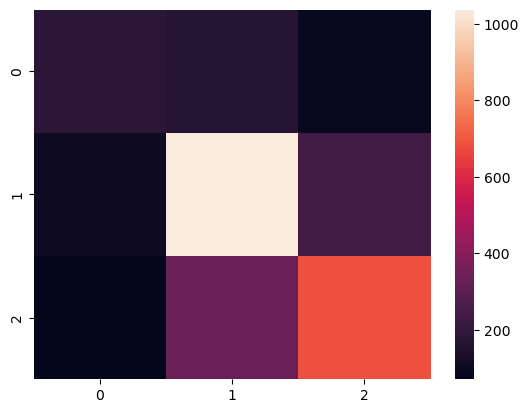

In [30]:
# you can also visualize this as a heatmap

import seaborn as sns
sns.heatmap(confusion_matrix(y_test, y_pred))

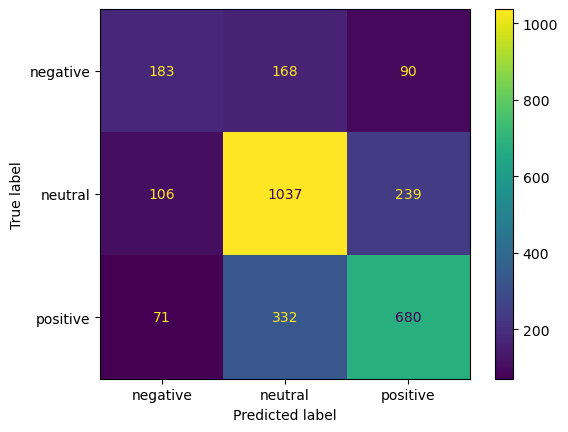

In [31]:
# or with sklearn directly
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_).plot()

In [32]:
# let's store these predictions for later
test['bow_sentiment'] = y_pred

### Approach 2: Word Embeddings

In [33]:
# ! pip install fasttext

In [34]:
import fasttext
import fasttext.util

# Load pre-trained model (e.g., English Wikipedia embeddings)
fasttext.util.download_model('en', if_exists='ignore')  # English
model = fasttext.load_model('cc.en.300.bin')

In [35]:
# Get embeddings for a single text
text = "This is a test sentence."
embedding = model.get_sentence_vector(text)
print(embedding)

# Get embeddings for multiple texts
texts = ["This is a test sentence.", "Another sentence for testing."]
embeddings = [model.get_sentence_vector(text) for text in texts]
print(embeddings)

[-2.15643141e-02 -2.75032502e-02 -2.90404446e-02  3.43871638e-02
 -1.08842319e-02 -2.80844700e-02  1.95636451e-02  2.93526445e-02
 -1.12048453e-02 -1.04701789e-02 -1.40814753e-02 -6.12852303e-03
  1.16000930e-02  1.98995285e-02 -2.18304265e-02  9.76822302e-02
  2.20174696e-02 -2.28273235e-02 -1.13258651e-02 -1.76453218e-02
 -2.24553030e-02 -2.62721814e-02  6.81071728e-03 -4.90607284e-02
  1.05109429e-02  7.71335280e-03  9.78921074e-03  2.22622510e-02
 -1.15251867e-02  7.41823241e-02 -6.72146538e-03  3.18970680e-02
  1.51034445e-02 -8.08423534e-02  2.66189734e-03  1.81761310e-02
  1.24634448e-02 -5.89111820e-02  2.89766975e-02 -1.67602152e-02
 -1.36840167e-02 -2.54555196e-02 -2.85102637e-03  1.95470154e-02
  1.78618208e-02  5.96131645e-02 -4.56193648e-02  2.10593380e-02
 -7.90707488e-03  1.01496829e-02 -1.09705152e-02  1.90120272e-03
 -3.10599152e-02 -1.33205345e-02  7.92419165e-03  5.69493603e-03
  1.78723074e-02 -2.84086224e-02 -7.10906684e-02  3.08412202e-02
 -1.66979514e-03 -1.85443

Instead of the BoW representation, we can use the more semantically grounded Fasttext representation in our classifier.

In [36]:
X_train = [model.get_sentence_vector(text) for text in train['text'].values]
X_test = [model.get_sentence_vector(text) for text in test['text'].values]

In [37]:
sv = LinearSVC(random_state=0, tol=1e-5)
clf = sv.fit(X_train, y_train)

C:\Users\isen1\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [38]:
clf.predict([model.get_sentence_vector(anti_biden_tweet)])

array(['positive'], dtype=object)

In [39]:
# predict the labels of the test set
y_pred = clf.predict(X_test)

In [40]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.64      0.28      0.39       441
     neutral       0.66      0.83      0.74      1382
    positive       0.67      0.61      0.64      1083

    accuracy                           0.67      2906
   macro avg       0.66      0.57      0.59      2906
weighted avg       0.66      0.67      0.65      2906



In [41]:
# let's save the labels for later
test['fasttext_sentiment'] = y_pred

### Approach 3: Deep Learning Models like BERT

In [42]:
# ! pip3 install simpletransformers

In [43]:
from simpletransformers.classification import ClassificationModel, ClassificationArgs

We one-hot or dummy encode our sentiment label variables, because a numeric representation is easier to deal with. 

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train['sentiment'])
train['labels'] = le.transform(train['sentiment'])
test['labels'] = le.transform(test['sentiment'])

In [45]:
# let's see an example of the encoded sentiment values
test['labels'][0:5]

5452    1
8211    2
6426    2
4102    1
5330    2
Name: labels, dtype: int32

In [46]:
# we can also reverse this to get the word labels back
le.inverse_transform(test['labels'][0:5])

array(['neutral', 'positive', 'positive', 'neutral', 'positive'],
      dtype=object)

In [47]:
# Optional model configuration
model_args = ClassificationArgs(num_train_epochs=3,
                                output_dir='output_st',
                                overwrite_output_dir=True)

# Create a ClassificationModel
model = ClassificationModel(
    "distilbert", "distilbert-base-uncased",
    args=model_args, use_cuda = False, num_labels=3
)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.bias', 'pre_classifier.weight', 'classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [48]:
train_df = train[['text', 'labels']]
test_df = test[['text', 'labels']]

In [49]:
train_df

,text,labels
4445,sept 27th | Cherub\u002c Pell | Ricks Cafe | $...,1
488,Boogie song of the day...Oh Ricky Martin: Que ...,1
4646,@GiniMartinez just scheduled it today for this...,1
6110,Is it April Fool's Day? Real Madrid signs 7-y...,0
3396,Dethklok\u002c All That Remains\u002c and Blac...,2
...,...,...
5999,:O INBETWEENERS MOVIE A WEEK TODAY!! Aaaahhhh!...,2
8479,Friday After Next just came on VH1 I\u2019m bo...,1
8025,@vegan_punk Ayup! Hope alls okay. We\u2019re h...,2
9303,I dreamt I sat with @MaryRobinette at a Star W...,1


In [50]:
# Train the model
model.train_model(train_df)

  0%|          | 0/6778 [00:00<?, ?it/s]

Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Running Epoch 0 of 3:   0%|          | 0/848 [00:00<?, ?it/s]

Running Epoch 1 of 3:   0%|          | 0/848 [00:00<?, ?it/s]

Running Epoch 2 of 3:   0%|          | 0/848 [00:00<?, ?it/s]

(2544, 0.5231204648400033)

In [51]:
predictions, raw_outputs = model.predict([anti_biden_tweet])
le.inverse_transform(predictions)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

array(['negative'], dtype=object)

In [52]:
# Evaluate the model
result, model_outputs, wrong_predictions = model.eval_model(test_df)
result

  0%|          | 0/2906 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/364 [00:00<?, ?it/s]

{'mcc': 0.5534980863652954, 'eval_loss': 0.9554176735998756}

In [53]:
# if you want to store the predictions for later. This is also how you do inference on unlabeled data
preds, probs = model.predict(list(test_df['text'].values))
preds = le.inverse_transform(preds)

print(classification_report(test['sentiment'], preds))

  0%|          | 0/2906 [00:00<?, ?it/s]

  0%|          | 0/364 [00:00<?, ?it/s]

              precision    recall  f1-score   support

    negative       0.60      0.62      0.61       441
     neutral       0.75      0.74      0.75      1382
    positive       0.75      0.75      0.75      1083

    accuracy                           0.73      2906
   macro avg       0.70      0.70      0.70      2906
weighted avg       0.73      0.73      0.73      2906



In [54]:
# let's store these labels for later
test['distilbert_sentiment'] = preds

### Approach 4: Zero-shot Natural Language Inference

In [55]:
# ! pip install transformers

In [56]:
### zero-shot NLI classification
from transformers import pipeline

classifier = pipeline("zero-shot-classification",model='facebook/bart-large-mnli')

In [57]:
classifier(anti_biden_tweet, ['positive', 'negative', 'neutral']) # for sentiment

{'sequence': "Ugh, this was true yesterday and it's also true now: Biden is an idiot",
 'labels': ['negative', 'neutral', 'positive'],
 'scores': [0.9898146986961365, 0.005843203514814377, 0.0043421052396297455]}

In [58]:
labels = ['positive', 'negative', 'neutral']
scores = classifier(anti_biden_tweet, labels)

In [59]:
scores['labels'][0] # the label with the highest score

'negative'

In [60]:
# let's do this for the full test set
from tqdm import tqdm # neat library for keeping track of how much yourdata has been processed

In [ ]:
bart_scores = []
for text in tqdm(test['text'].values):
    bart_scores.append(classifier(text, labels)['labels'][0])

  1%|▌                                                                                                               | 15/2906 [00:30<1:36:52,  2.01s/it]

In [ ]:
print(classification_report(test['sentiment'], bart_scores))

In [ ]:
test['bart_sentiment'] = bart_scores

### Approach 5: Off-the-shelf techniques (VADER)

We will use VADER sentiment: https://github.com/cjhutto/vaderSentiment which stands for Valence Aware Dictionary and sEntiment Reasoner. It is a lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media. 

In [ ]:
import nltk # VADER is a part of the popular NLP toolkit called nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

VADER return four scores: positive, negative, neutral and compound

In [ ]:
sid.polarity_scores(anti_biden_tweet)

Oftne, the compound score is thresholded to get categorical or ordinal labels. The paper suggests the following:

**negative**: -1 to -0.1

**neutral**: -0.1 to 0.1

**positive**: 0.1 to 1

In [ ]:
test['vader_sentiment_score'] = [sid.polarity_scores(i) for i in test['text']]
test['vader_sentiment_score'] = [sid.polarity_scores(i)['compound'] for i in test['text']]

In [ ]:
test

In [ ]:
def vader_apply(row):
    if -1 < row['vader_sentiment_score'] < -0.1:
        return 'negative'
    elif 0.1 < row['vader_sentiment_score'] < 1:
        return 'positive'
    else:
        return 'neutral'
test['vader_sentiment'] = test.apply(vader_apply, axis = 1)
test.head()

In [ ]:
print(classification_report(test['sentiment'], test['vader_sentiment']))

Now save all the labels in CSV format for using at a later point

In [ ]:
test.to_csv('labeled_test_set.csv')

### Ex 1.2: Collect some posts from your favorite subreddit. Use any two of these approaches to find the sentiment of the posts. Compare the sentiment estimates from different approaches.

### More NLP pointers:

Nice set of tuorials for deep learning: https://www.aiforhumanists.com/tutorials/

NLP crash course: https://lena-voita.github.io/nlp_course.html